In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings

# GATHER DATA

In [2]:
# Collecting the data from Kaggle website
df = pd.read_csv("C:/Users/91789/Desktop/coapps final project/accident data.csv")
df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [3]:
#Gives first few rows from the dataset
df.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle


In [4]:
#Gives last few rows from the dataset
df.tail()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc
660678,201091NM02142,Serious,28-02-2022,57.575210,Daylight,Highland,-3.895673,1,1,Wet or damp,Dual carriageway,Rural,Snowing no high winds,Car


# DATA PREPROCESSING

In [5]:
#Generate descriptive statistics about dataset
df.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [6]:
#Give number of rows and columns in dataset
df.shape

(660679, 14)

In [7]:
#Checking for no.of column
df.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type'],
      dtype='object')

In [8]:
#To check for the missing values in column
df.isnull().sum()


Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [9]:
#Cleaning the data
#Dropping the missing values of columns
df1 = df.dropna()
df1.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [10]:
#Dropping duplicated rows and missing values
df.loc[~df.duplicated()].reset_index(drop = True).copy()
df = df.dropna()

In [11]:
#Check for information concerning the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 642796 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    642796 non-null  object 
 1   Accident_Severity        642796 non-null  object 
 2   Accident Date            642796 non-null  object 
 3   Latitude                 642796 non-null  float64
 4   Light_Conditions         642796 non-null  object 
 5   District Area            642796 non-null  object 
 6   Longitude                642796 non-null  float64
 7   Number_of_Casualties     642796 non-null  int64  
 8   Number_of_Vehicles       642796 non-null  int64  
 9   Road_Surface_Conditions  642796 non-null  object 
 10  Road_Type                642796 non-null  object 
 11  Urban_or_Rural_Area      642796 non-null  object 
 12  Weather_Conditions       642796 non-null  object 
 13  Vehicle_Type             642796 non-null  object 
dtypes: float6

In [12]:
columns_to_drop = ['Index','Latitude', 'Light_Conditions','Longitude', 'Road_Type']
df = df.drop(columns_to_drop, axis=1)
df.head()

,Accident_Severity,Accident Date,District Area,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,Serious,05-06-2019,Kensington and Chelsea,1,2,Dry,Urban,Fine no high winds,Car
1,Serious,02-07-2019,Kensington and Chelsea,1,2,Wet or damp,Urban,Raining no high winds,Car
3,Serious,16-08-2019,Kensington and Chelsea,1,4,Dry,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
5,Serious,18-09-2019,Kensington and Chelsea,2,3,Dry,Urban,Fine no high winds,Car
6,Serious,05-09-2019,Kensington and Chelsea,1,2,Dry,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under


# EXPLORE DATA ANALYSIS

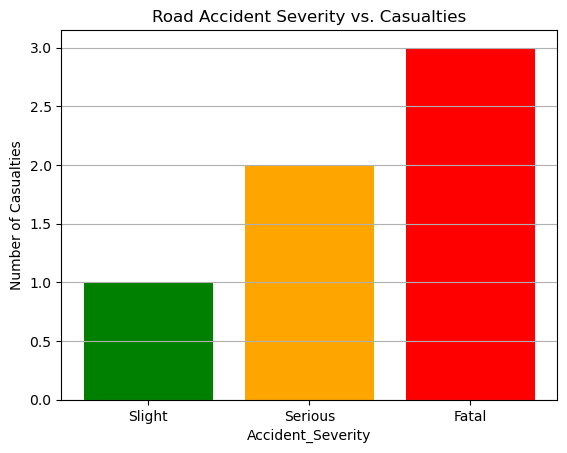

In [13]:
severity_levels = ['Slight', 'Serious', 'Fatal']
casualties = [1,2,3]
plt.bar(severity_levels, casualties, color=['green', 'orange', 'red'],data = df)
plt.xlabel('Accident_Severity')
plt.ylabel('Number of Casualties')
plt.title('Road Accident Severity vs. Casualties')
plt.grid(axis='y')

# Show the plot
plt.show()

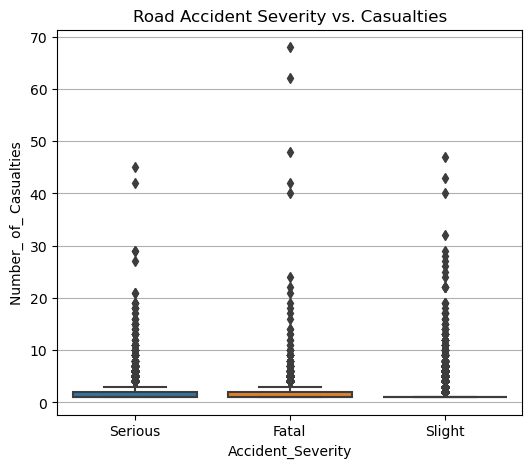

In [14]:
severity_levels = ['Slight', 'Serious', 'Fatal']
casualties = [3,2,1]  
# Create a bar box plot
plt.figure(figsize=(6,5))
sns.boxplot(x ='Accident_Severity', y ='Number_of_Casualties', data=df)
plt.xlabel('Accident_Severity')
plt.ylabel('Number_ of_ Casualties')
plt.title('Road Accident Severity vs. Casualties')
plt.grid(axis='y')
# Show the plot
plt.show()

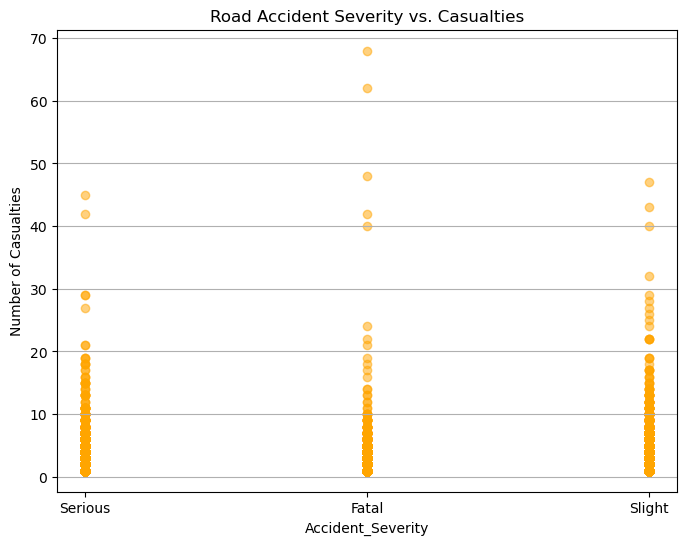

In [15]:
severity_levels = ['Slight', 'Serious', 'Fatal']
casualties = [1,2,3]
plt.figure(figsize=(8, 6))
plt.scatter(x = "Accident_Severity",y = "Number_of_Casualties", alpha=0.5, color='orange',data = df)
plt.xlabel('Accident_Severity')
plt.ylabel('Number of Casualties')
plt.title('Road Accident Severity vs. Casualties')
plt.grid(axis='y')

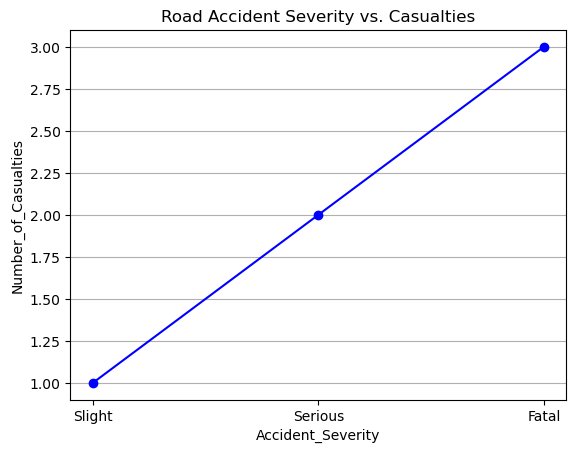

In [16]:
severity_levels = ['Slight', 'Serious', 'Fatal']
casualties = [1,2,3] 
# Create a line graph
plt.plot(severity_levels, casualties, marker='o', linestyle='-', color='blue')
plt.xlabel('Accident_Severity')
plt.ylabel('Number_of_Casualties')
plt.title('Road Accident Severity vs. Casualties')
plt.grid(axis='y')

# Show the plot
plt.show()

<Axes: >

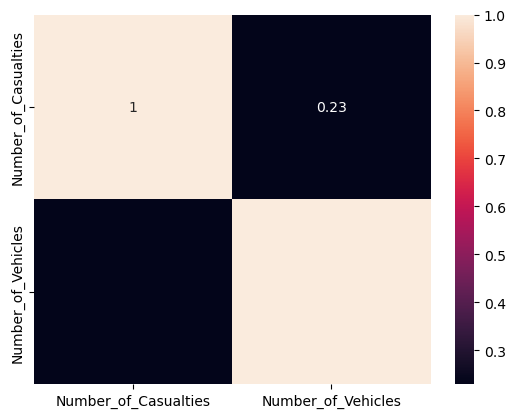

In [17]:
df.select_dtypes(include="number").corr()
sns.heatmap(df.select_dtypes(include="number").corr(),annot=True)


C:\Users\91789\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91789\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


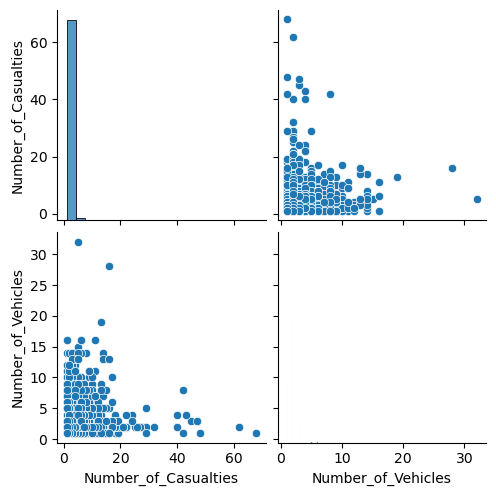

In [18]:
sns.pairplot(df)

# SPLITTING THE DATA


In [19]:
#Providing the input & output data
#The input data(x,regressor)
x = np.array(df['Accident_Severity']).reshape(-1,1)
x.shape


(642796, 1)

In [20]:
print(x)

[['Serious']
 ['Serious']
 ['Serious']
 ...
 ['Slight']
 ['Serious']
 ['Serious']]


In [21]:
#The output data(y,predictor)
y = np.array(df["Number_of_Casualties"])
y.shape


(642796,)

In [22]:
print(y)

[1 1 1 ... 1 1 1]


In [23]:
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [24]:
#Exploring the Train & Test Datasets
from sklearn.model_selection import train_test_split

#split the data into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

#print out the shape of the traing and testing sets
print("Training set shape: ",x_train.shape,y_train.shape)
print("Testing set shape: ",x_test.shape,y_test.shape)


Training set shape:  (514236, 1) (514236,)
Testing set shape:  (128560, 1) (128560,)


# RANDOM FOREST CLASSIFIER

In [25]:
from sklearn.preprocessing import OneHotEncoder
# Example categorical data
data = np.array([['Slight'], ['Serious'], ['Fatal']])
# Initialize OneHotEncoder
encoder = OneHotEncoder()
# Fit and transform the data
encoded_data = encoder.fit_transform(data)
# Convert the sparse matrix to a dense array for visualization (if needed)
encoded_data_array = encoded_data.toarray()
# Print the encoded data
print(encoded_data_array)



[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [26]:
vectorization =  OneHotEncoder()
xv_train = vectorization.fit_transform(x_train)
xv_test =  vectorization.transform(x_test)

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xv_train,y_train)

RandomForestClassifier()

In [28]:
y_pred = rfc.predict(xv_test)
y_pred.shape


(128560,)

In [29]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
#Evaluate the perfomance of the model
#R2: variance of the dependent variable(target)explained by the independent variable
#How well the model fit the data.
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)

print("R2 score: ",r2)
print("Mean squared Error: ",mse)
print("mean Absolute Error: ",mae)

R2 score:  -0.18864320433778592
Mean squared Error:  0.8235920970752956
mean Absolute Error:  0.3615354698195395


In [30]:
rfc.score(xv_test,y_test)

0.7606565028002489

In [31]:
from sklearn.metrics import classification_report



# EVALUATING THE MODEL

In [32]:
from datetime import datetime
import pandas as pd
df = pd.read_csv("C:/Users/jaya2/OneDrive/Documents/final data.csv")

def manual_testing(date, district):
    print(date)
    r=df.loc[(df['Accident Date']==date) & (df['District Area']==district),['Accident_Severity','Road_Surface_Conditions','Weather_Conditions']]
    print(r)
date=input("Enter a date(dd-mm-yyyy format):")
district=input()
manual_testing(date,district)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/jaya2/OneDrive/Documents/final data.csv'

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.76      1.00      0.86     97790
           2       0.00      0.00      0.00     21214
           3       0.00      0.00      0.00      5960
           4       0.00      0.00      0.00      2246
           5       0.00      0.00      0.00       824
           6       0.00      0.00      0.00       300
           7       0.00      0.00      0.00       114
           8       0.00      0.00      0.00        47
           9       0.00      0.00      0.00        21
          10       0.00      0.00      0.00        11
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         4
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          22       0.00    

C:\Users\91789\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91789\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91789\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SAVING THE MODEL

In [34]:

import pickle


In [35]:
filename = "accident_prediction.sav"
pickle.dump(df,open(filename,'wb'))

In [36]:
#loading the saved model
loaded_model = pickle.load(open("accident_prediction.sav", 'rb'))

In [39]:
from datetime import datetime
import pandas as pd
df = pd.read_csv("C:/Users/91789\Desktop/coapps final project/accident data.csv")

def manual_testing(date, district):
    print(date)
    r=df.loc[(df['Accident Date']==date) & (df['District Area']==district),['Accident_Severity','Road_Surface_Conditions','Weather_Conditions']]
    print(r)
date=input("Enter a date(dd-mm-yyyy format):")
district=input()
manual_testing(date,district)

Enter a date(dd-mm-yyyy format): 23-02-2022
 Highland


23-02-2022
       Accident_Severity Road_Surface_Conditions  Weather_Conditions
660402            Slight                     Dry  Fine no high winds
660676            Slight            Frost or ice  Fine no high winds
660677           Serious             Wet or damp  Fine no high winds
